<a href="https://colab.research.google.com/github/Akshaya-hub/Home-Rent-Estimator/blob/Notebook/Home_rent_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df = pd.read_csv("/content/House_Rent_Dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [12]:
df.drop(columns="Posted On",axis=1, inplace = True)
df.drop(columns="Point of Contact",axis=1, inplace = True)

In [13]:
df.isnull().any()

,0
BHK,False
Rent,False
Size,False
Floor,False
Area Type,False
Area Locality,False
City,False
Furnishing Status,False
Tenant Preferred,False
Bathroom,False


In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [15]:
df.shape

(4746, 10)

In [16]:
df.dtypes

,0
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object
Bathroom,int64


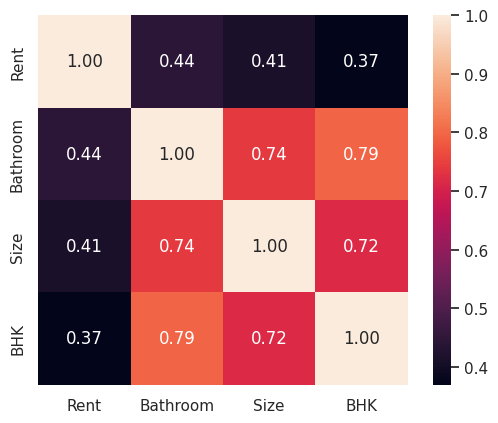

In [17]:

numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr(method='pearson')

# 3. Top 10 features most correlated with 'Rent'
if 'Rent' in correlation.columns:
    columns = correlation.nlargest(10, 'Rent')['Rent'].index
    correlation_map = np.corrcoef(numeric_df[columns].values.T)

    # 5. Plot heatmap
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(
        correlation_map,
        cbar=True,
        annot=True,
        square=True,
        fmt='.2f',
        yticklabels=columns.values,
        xticklabels=columns.values
    )
    plt.show()



In [18]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [19]:
#Since Rent and Size columns has large values
df['Rent'] = np.log(df['Rent'])
df['Size'] = np.log(df['Size'])

In [20]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,9.878141,6.665921,1.965866
std,0.832256,0.936642,0.708561,0.884532
min,1.000000,7.090077,2.302585,1.000000
25%,2.000000,9.210340,6.309918,1.000000
50%,2.000000,9.680344,6.745236,2.000000
75%,3.000000,10.404263,7.090077,2.000000
max,6.000000,15.068274,8.987197,10.000000


In [21]:
columns=columns.drop(['Rent'])

In [22]:
columns

Index(['Bathroom', 'Size', 'BHK'], dtype='object')

In [23]:
X = df[columns]
Y = df['Rent'].values

In [24]:
#Splitting the datset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Importing the Regression Libraries

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(X_train, Y_train)
pred=linear.predict(X_test)
#model is good if R square is high, and MSE is lowest
linear_rsq = (linear.score(X_test,Y_test))*100

linear_mse = mean_squared_error(pred, Y_test)

In [27]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
lasso_pred=lasso.predict(X_test)
#model is good if R square is high, and MSE is lowest
lasso_rsq = (lasso.score(X_test,Y_test))*100

lasso_mse = mean_squared_error(lasso_pred, Y_test)


In [28]:
el = ElasticNet()
el.fit(X_train, Y_train)
el_pred=el.predict(X_test)
#model is good if R square is high, and MSE is lowest
el_rsq = (el.score(X_test,Y_test))*100

el_mse = mean_squared_error(el_pred, Y_test)

In [29]:
dec = DecisionTreeRegressor()
dec.fit(X_train, Y_train)
dec_pred=dec.predict(X_test)
#model is good if R square is high, and MSE is lowest
dec_rsq = (dec.score(X_test,Y_test))*100

dec_mse = mean_squared_error(dec_pred, Y_test)

In [30]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y_train)
kn_pred=kn.predict(X_test)
#model is good if R square is high, and MSE is lowest
kn_rsq = (kn.score(X_test,Y_test))*100

kn_mse = mean_squared_error(kn_pred, Y_test)

In [31]:
grad = GradientBoostingRegressor()
grad.fit(X_train, Y_train)
grad_pred=grad.predict(X_test)
#model is good if R square is high, and MSE is lowest
grad_rsq = (grad.score(X_test,Y_test))*100

grad_mse = mean_squared_error(grad_pred, Y_test)

In [32]:

list_reg=['Linear','Lasso','ElasticNet','Decision Tree','KNeighbors','Gradient Boost']
data = {'Regressor': list_reg, 'R Score': [linear_rsq, lasso_rsq, el_rsq,dec_rsq,kn_rsq,grad_rsq], 'MSE':[linear_mse, lasso_mse, el_mse,dec_mse,kn_mse,grad_mse]}
reg_df=pd.DataFrame(data)
reg_df

,Regressor,R Score,MSE
0,Linear,51.320298,0.419857
1,Lasso,-0.003253,0.862517
2,ElasticNet,7.175446,0.800602
3,Decision Tree,47.930961,0.449090
4,KNeighbors,50.547678,0.426521
5,Gradient Boost,54.395754,0.393332


In [33]:
import pickle
pickle.dump(grad,open('regression.pkl','wb'))

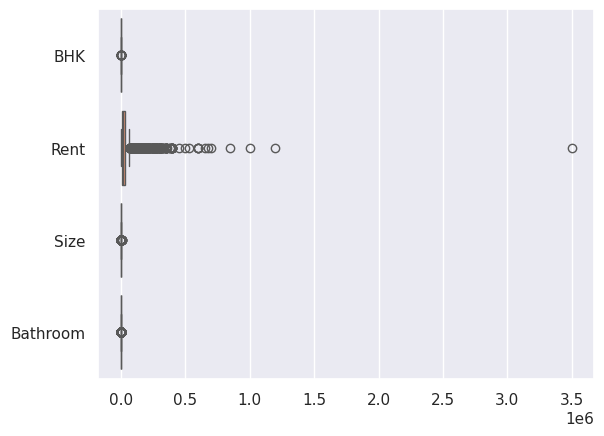

In [34]:
fig, axs = plt. subplots()
sns.boxplot(data=numeric_df, orient='h', palette="Set2")
plt.show()

<Axes: xlabel='Size'>

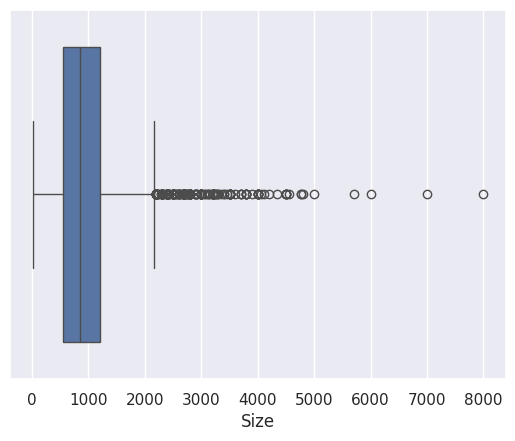

In [35]:
sns.boxplot(x=numeric_df['Size'])

<Axes: xlabel='Bathroom'>

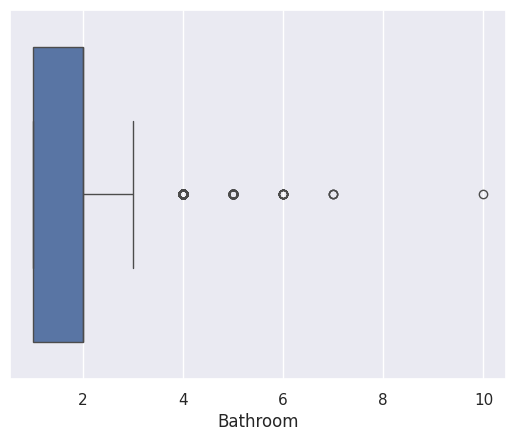

In [36]:
sns.boxplot(x=numeric_df['Bathroom'])